In [2]:
import pandas as pd
import numpy as np
import sklearn 

In [3]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(["PassengerId","Pclass","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis=1,inplace=True)

In [5]:
df

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500
...,...,...,...,...
886,0,male,27.0,13.0000
887,1,female,19.0,30.0000
888,0,female,NaN,23.4500
889,1,male,26.0,30.0000


In [6]:
df.isnull().sum()

Survived      0
Sex           0
Age         177
Fare          0
dtype: int64

In [7]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [8]:
df["Age"]=df["Age"].astype("int64")

In [9]:
df["Sex"].replace({"male":1,"female":0},inplace=True)

In [10]:
df.dtypes

Survived      int64
Sex           int64
Age           int64
Fare        float64
dtype: object

In [11]:
from sklearn.model_selection import train_test_split

inputVar=df[["Sex","Age","Fare"]] # x
targetVar=df["Survived"] # y
x_train,x_test,y_train,y_test=train_test_split(inputVar,targetVar,test_size=0.3,random_state=45)

In [12]:
x_train.shape

(623, 3)

In [13]:
x_test.shape

(268, 3)

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [15]:
y_pred=gnb.predict(x_test)

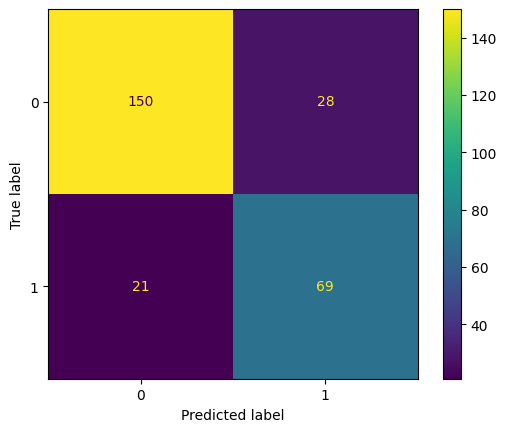

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, confusion_matrix, precision_score
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


In [17]:
tn = cm[0][0]
fn = cm[0][1]
tp = cm[1][0]
fp = cm[1][1]

print(f"True Positive:  {tp}", end="   ")
print(f"True Negative: {tn}")
print(f"False Positive: {fp}", end="   ")
print(f"False Negative: {fn}")


True Positive:  21   True Negative: 150
False Positive: 69   False Negative: 28


In [25]:
accuracy_score(y_test,y_pred)

0.6380597014925373

In [28]:
precision_score(y_test, y_pred)

0.711340206185567

In [20]:
recall_score(y_test,y_pred)

0.7666666666666667